INSTRUCTIONS: Build a decision tree classification model using the dataset “Social_Network_Ads.csv.” What is its accuracy score?

# Import the libraries and dataset

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

In [21]:
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# Split into output and input sets

In [22]:
#take the input and output sets
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Build the model

In [23]:
#no need for splitting and feature scaling
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(X, y)

DecisionTreeClassifier(random_state=0)

# Get the accuracy

In [24]:
classifier.score(X, y)

0.995

CONCLUSION: The accuracy of decision tree classification model is 0.995.

#   

INSTRUCTIONS: Build a kernelized SVM model using the same dataset as above but using a non-linear kernel function. Try experimenting with the three types of kernel functions and compare the accuracy ratings and the visualizations. Which do you think is the best?

# Split into test and train sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 0)

# Feature scaling

In [30]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create the model for kernel = 'poly'

In [47]:
svm_poly = SVC(kernel = 'poly', degree = 8)

#train the sets
svm_poly.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

# Create the model for kernel = 'rbf'

In [48]:
svm_rbf = SVC(kernel = 'rbf')
svm_rbf.fit(X_train, y_train)

SVC()

# Create the model for kernel = 'sigmoid'

In [49]:
svm_sigmoid = SVC(kernel = 'sigmoid')
svm_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

# Predict and Evaluate

In [53]:
#make predictions
y_pred_poly = svmpoly.predict(X_test)
y_pred_rbf = svmrbf.predict(X_test)
y_pred_sigmoid = svm_sigmoid.predict(X_test)

#evaluation
print("For poly kernel:")
print(confusion_matrix(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))

print("For rbf kernel:")
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

print("For sigmoid kernel:")
print(confusion_matrix(y_test, y_pred_sigmoid))
print(classification_report(y_test, y_pred_sigmoid))

For poly kernel:
[[56  2]
 [12 10]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        58
           1       0.83      0.45      0.59        22

    accuracy                           0.82        80
   macro avg       0.83      0.71      0.74        80
weighted avg       0.83      0.82      0.81        80

For rbf kernel:
[[55  3]
 [ 1 21]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80

0.95
For sigmoid kernel:
[[50  8]
 [ 8 14]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        58
           1       0.64      0.64      0.64        22

    accuracy                           0.80        80
   macro avg 

0.8

# Check accuracy level

In [57]:
print("For poly kernel:")
print(accuracy_score(y_test, y_pred_poly), "\n")

print("For gaussian kernel:")
print(accuracy_score(y_test, y_pred_rbf), "\n")

print("For sigmoid kernel:")
accuracy_score(y_test, y_pred_sigmoid)

For poly kernel:
0.825 

For rbf kernel:
0.95 

For sigmoid kernel:


0.8

# Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


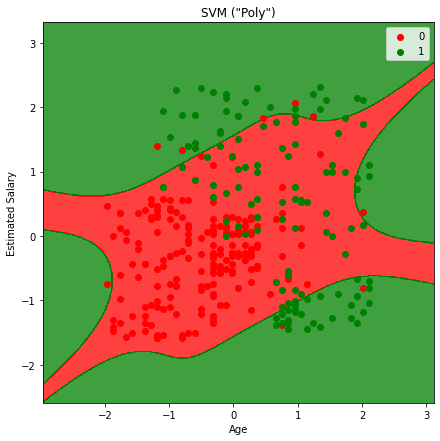

In [62]:
plt.figure(figsize = (7,7))

#inverse the transformed training set
X_set, y_set = sc.inverse_transform(X_train), y_train

#create the plot
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm_poly.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

#plot the values 
for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    
#add the title, labels, and legends
plt.title('SVM ("Poly")')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


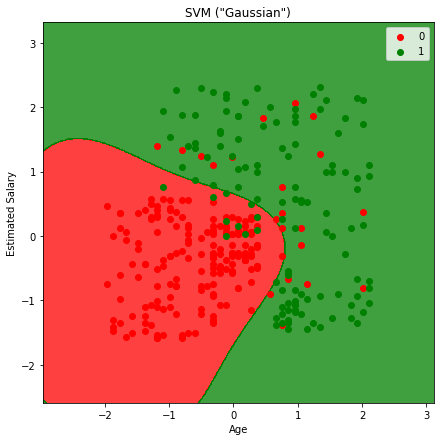

In [63]:
plt.figure(figsize = (7,7))

#inverse the transformed training set
X_set, y_set = sc.inverse_transform(X_train), y_train

#create the plot
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm_rbf.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

#plot the values 
for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    
#add the title, labels, and legends
plt.title('SVM ("Gaussian")')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


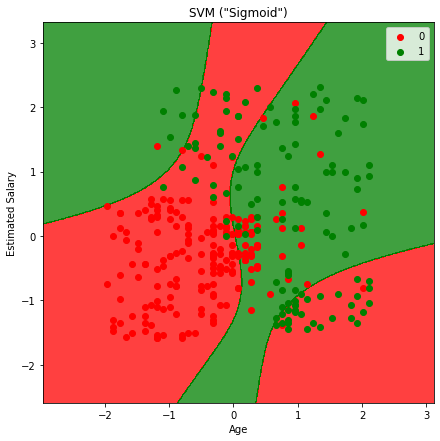

In [64]:
plt.figure(figsize = (7,7))

#inverse the transformed training set
X_set, y_set = sc.inverse_transform(X_train), y_train

#create the plot
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm_sigmoid.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

#plot the values 
for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    
#add the title, labels, and legends
plt.title('SVM ("Sigmoid")')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()